In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import applestore applicaitons
google=pd.read_csv('../Data/googleplaystore.csv')
apple=pd.read_csv('../Data/AppleStore.csv',index_col=[0])

# Clean Data

Googel and Apple dataset are similar, but some features appear in only one dataset. Therefore, I will drop features that appears only in one dataset and keep features that are common in two datasets. 

### Clean Google Data 

In [3]:
google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [4]:
#drop columns that I am not interested in
google=google.drop(columns=['Installs','Last Updated','Type','Genres','Current Ver','Android Ver'])
google

,App,Category,Rating,Reviews,Size,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,0,Everyone
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,0,Everyone
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,0,Mature 17+


In [5]:
#Recategorizing google apps to match category in Apple store
def recategorize (x):
    if x=='BOOKS_AND_REFERENCE':
        return 'Books & Reference'
    elif x=='BUSINESS':
        return 'Business'
    elif x in ['ENTERTAINMENT','Comics','EVENTS']:
        return 'Entertainment'
    elif x=='FOOD_AND_DRINK':
        return 'Food & Drink'
    elif x in ["EDUCATION", "PARENTING"]:
        return "Education"
    elif x in ["SOCIAL", "COMMUNICATION"]:
        return "Social Networking"
    elif x == "PRODUCTIVITY":
        return "Productivity"
    elif x == "WEATHER":
        return "Weather"
    elif x == "MAPS_AND_NAVIGATION":
        return "Navigation"
    elif x == "GAME":
        return "Games"
    elif x in ["HEALTH_AND_FITNESS", "BEAUTY"]:
        return 'Health & Fitness'
    elif x in ['LIFESTYLE',"DATING","FAMILY","AUTO_AND_VEHICLES","HOUSE_AND_HOME"]:
        return "Lifestyle"
    elif x == "MEDICAL":
        return "Medical"
    elif x == "SHOPPING":
        return "Shopping"
    elif x == "PHOTOGRAPHY" or x == "VIDEO_PLAYERS":
        return "Photo & Video"
    elif x == "NEWS_AND_MAGAZINES":
        return "News"
    elif x == "FINANCE":
        return "Finance"
    elif x == "TRAVEL_AND_LOCAL":
        return "Travel"
    elif x == "SPORTS":
        return "Sports"
    elif x in ["TOOLS", "ART_AND_DESIGN",'PERSONALIZATION', 'LIBRARIES_AND_DEMO']:
        return "Utilities"
    else:
        pass
    
google['Category']=google['Category'].replace([x for x in google['Category']],[recategorize(x) for x in google['Category']])
google

    

,App,Category,Rating,Reviews,Size,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,Utilities,4.1,159,19M,0,Everyone
1,Coloring book moana,Utilities,3.9,967,14M,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Utilities,4.7,87510,8.7M,0,Everyone
3,Sketch - Draw & Paint,Utilities,4.5,215644,25M,0,Teen
4,Pixel Draw - Number Art Coloring Book,Utilities,4.3,967,2.8M,0,Everyone
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Lifestyle,4.5,38,53M,0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Lifestyle,5.0,4,3.6M,0,Everyone
10838,Parkinson Exercices FR,Medical,NaN,3,9.5M,0,Everyone
10839,The SCP Foundation DB fr nn5n,Books & Reference,4.5,114,Varies with device,0,Mature 17+


In [6]:
#change 3.0M reviews to 3,000,000 reviews
def clean_reviews(x):
    if 'M' in x:
        x=x.replace('.0M','000000')
        return x
    else:
        return x
    
google['Reviews']=google['Reviews'].replace([x for x in google['Reviews']],[clean_reviews(x) for x in google['Reviews']])

In [7]:
# add rating class
google.loc[(google['Rating']>=0)&(google['Rating']<2),'Rating Level']='F'
google.loc[(google['Rating']>=2)&(google['Rating']<3),'Rating Level']='D'
google.loc[(google['Rating']>=3)&(google['Rating']<4),'Rating Level']='C'
google.loc[(google['Rating']>=4)&(google['Rating']<4.5),'Rating Level']='B'
google.loc[(google['Rating']>=4.5)&(google['Rating']<=5),'Rating Level']='A'
google

,App,Category,Rating,Reviews,Size,Price,Content Rating,Rating Level
0,Photo Editor & Candy Camera & Grid & ScrapBook,Utilities,4.1,159,19M,0,Everyone,B
1,Coloring book moana,Utilities,3.9,967,14M,0,Everyone,C
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Utilities,4.7,87510,8.7M,0,Everyone,A
3,Sketch - Draw & Paint,Utilities,4.5,215644,25M,0,Teen,A
4,Pixel Draw - Number Art Coloring Book,Utilities,4.3,967,2.8M,0,Everyone,B
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Lifestyle,4.5,38,53M,0,Everyone,A
10837,Fr. Mike Schmitz Audio Teachings,Lifestyle,5.0,4,3.6M,0,Everyone,A
10838,Parkinson Exercices FR,Medical,NaN,3,9.5M,0,Everyone,NaN
10839,The SCP Foundation DB fr nn5n,Books & Reference,4.5,114,Varies with device,0,Mature 17+,A


In [8]:
# remove $ from price
google['Price']=google['Price'].apply(lambda x:x.replace('$',''))
google.loc[google['Price']!=0]

,App,Category,Rating,Reviews,Size,Price,Content Rating,Rating Level
0,Photo Editor & Candy Camera & Grid & ScrapBook,Utilities,4.1,159,19M,0,Everyone,B
1,Coloring book moana,Utilities,3.9,967,14M,0,Everyone,C
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Utilities,4.7,87510,8.7M,0,Everyone,A
3,Sketch - Draw & Paint,Utilities,4.5,215644,25M,0,Teen,A
4,Pixel Draw - Number Art Coloring Book,Utilities,4.3,967,2.8M,0,Everyone,B
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Lifestyle,4.5,38,53M,0,Everyone,A
10837,Fr. Mike Schmitz Audio Teachings,Lifestyle,5.0,4,3.6M,0,Everyone,A
10838,Parkinson Exercices FR,Medical,NaN,3,9.5M,0,Everyone,NaN
10839,The SCP Foundation DB fr nn5n,Books & Reference,4.5,114,Varies with device,0,Mature 17+,A


In [9]:
#take a look at application where price is Everyone
google[google['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Price,Content Rating,Rating Level
10472,Life Made WI-Fi Touchscreen Photo Frame,None,19.0,3000000,"1,000+",Everyone,NaN,NaN


In [10]:
#drop the app whose price is 'Everyone'
google.drop(google[google['Price']=='Everyone'].index,inplace=True)

#change price type to float
google['Price']=google.Price.astype(float)

In [11]:
# set price level
google.loc[google['Price']==0, 'Price Level']=0
google.loc[(google['Price']>0) & (google['Price']<5),'Price Level']='0.1-4.9'
google.loc[(google['Price']>=5)& (google['Price']<10), 'Price Level']='5-9.9'
google.loc[(google['Price']>=10)& (google['Price']<30),'Price Level']='10-29.9'
google.loc[(google['Price']>=30)& (google['Price']<50),'Price Level']='30-49.9'
google.loc[(google['Price']>=50)& (google['Price']<100),'Price Level']='50-99.9'
google.loc[google['Price']>=100,'Price Level']='100+'



In [12]:
google

,App,Category,Rating,Reviews,Size,Price,Content Rating,Rating Level,Price Level
0,Photo Editor & Candy Camera & Grid & ScrapBook,Utilities,4.1,159,19M,0.0,Everyone,B,0
1,Coloring book moana,Utilities,3.9,967,14M,0.0,Everyone,C,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Utilities,4.7,87510,8.7M,0.0,Everyone,A,0
3,Sketch - Draw & Paint,Utilities,4.5,215644,25M,0.0,Teen,A,0
4,Pixel Draw - Number Art Coloring Book,Utilities,4.3,967,2.8M,0.0,Everyone,B,0
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Lifestyle,4.5,38,53M,0.0,Everyone,A,0
10837,Fr. Mike Schmitz Audio Teachings,Lifestyle,5.0,4,3.6M,0.0,Everyone,A,0
10838,Parkinson Exercices FR,Medical,NaN,3,9.5M,0.0,Everyone,NaN,0
10839,The SCP Foundation DB fr nn5n,Books & Reference,4.5,114,Varies with device,0.0,Mature 17+,A,0


### Clean Apple Data

In [13]:
apple.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [14]:
#drop some unnecessary columns
apple=apple.drop(columns=['id','track_name','currency','rating_count_ver','user_rating_ver','ver','sup_devices.num','ipadSc_urls.num','lang.num','vpp_lic'])



In [15]:
#rename columns
apple=apple.rename(columns={'size_bytes':'Size','rating_count_tot':'Reviews','user_rating':'Rating','cont_rating':'Content Rating','prime_genre':'Category','price':'Price'})
apple.head(5)

,Size,Price,Reviews,Rating,Content Rating,Category
1,100788224,3.99,21292,4.0,4+,Games
2,158578688,0.00,161065,4.0,4+,Productivity
3,100524032,0.00,188583,3.5,4+,Weather
4,128512000,0.00,262241,4.0,12+,Shopping
5,92774400,0.00,985920,4.5,4+,Reference


In [16]:
# match content rating in apple dataset to google, so it's reasonable to compare 
def match_content_rating (x):
    if x=='4+':
        return 'Everyone'
    elif x=='9+':
        return 'Everyone 10+'
    elif x=='12+':
        return 'Teen'
    elif x=='17+':
        return 'Mature 17+'
    
apple['Content Rating']=apple['Content Rating'].replace([x for x in apple['Content Rating']],[match_content_rating(x) for x in apple['Content Rating']] )
    


In [17]:
#make reference and book apps fall into the same category
def clean_apple_category(x):
    if x=='Reference' or x=='Book':
        return "Books & Reference"
    elif x=='Music':
        return 'Utilities'
    else:
        return x
apple['Category']=apple['Category'].replace([x for x in apple['Category']],[clean_apple_category(x) for x in apple['Category']])

In [18]:
#add rating level
apple.loc[(apple['Rating']>=0)&(apple['Rating']<2),'Rating Level']='F'
apple.loc[(apple['Rating']>=2)&(apple['Rating']<3), 'Rating Level']='D'
apple.loc[(apple['Rating']>=3)&(apple['Rating']<4), 'Rating Level']='C'
apple.loc[(apple['Rating']>=4)&(apple['Rating']<4.5),'Rating Level']='B'
apple.loc[(apple['Rating']>=4.5)&(apple['Rating']<=5),'Rating Level']='A'
apple

,Size,Price,Reviews,Rating,Content Rating,Category,Rating Level
1,100788224,3.99,21292,4.0,Everyone,Games,B
2,158578688,0.00,161065,4.0,Everyone,Productivity,B
3,100524032,0.00,188583,3.5,Everyone,Weather,C
4,128512000,0.00,262241,4.0,Teen,Shopping,B
5,92774400,0.00,985920,4.5,Everyone,Books & Reference,A
...,...,...,...,...,...,...,...
11081,126644224,0.00,142,4.5,Everyone,Games,A
11082,120760320,0.00,30,4.5,Everyone,Games,A
11087,111322112,1.99,15,4.5,Everyone 10+,Utilities,A
11089,97235968,0.00,85,4.5,Teen,Games,A


 # Features Comparison

In [19]:
#create free and paid variable 
googlefree=google[google['Price']==0]
googlepaid=google[google['Price']!=0]

applefree=apple[apple['Price']==0]
applepaid=apple[apple['Price']!=0]

#create labels
free_paid_label1=['Free','Paid']
free_paid_label2=['Free','Paid']

google_free_paid_count=[len(googlefree), len(googlepaid)]
apple_free_paid_count=[len(applefree), len(applepaid)]


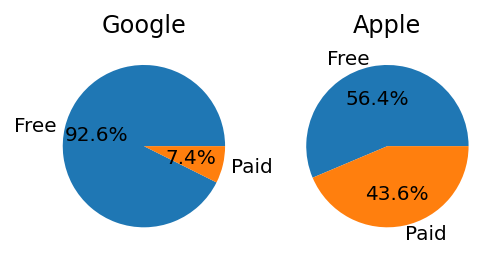

In [20]:
#the same figure for both subplots
fig1=plt.figure(figsize=(4,3),dpi=144)
#plt.suptitle('Free and Paid Comparsion')

#axes object for the firs pie chart
fig1_ax1=fig1.add_subplot(121)

#plot the first pie chart in ax1
fig1_ax1.pie(google_free_paid_count, labels=free_paid_label1,autopct='%1.1f%%')
fig1_ax1.title.set_text('Google')



#axes oject ofr the second pie chart
fig1_ax2=fig1.add_subplot(122)

#plot the second pie chart
fig1_ax2.pie(apple_free_paid_count,labels=free_paid_label2,autopct='%1.1f%%')
fig1_ax2.title.set_text('Apple')

Most applications in GooglePlay are free. However, there are many paid applicaitons in AppleStore.

In [21]:
#app count by category
google_cat=google.groupby('Category').mean()
google_cat['Count']=google['Category'].value_counts()
google_cat=google_cat.sort_values('Count', ascending=False)

apple_cat=apple.groupby('Category').mean()
apple_cat['Count']=apple['Category'].value_counts()
apple_cat=apple_cat.sort_values('Count', ascending=False)

fig2_label1=[x for x in google_cat.index]
fig2_label2=[x for x in apple_cat.index]

fig2_count1=[x for x in google_cat['Count']]
fig2_count2=[x for x in apple_cat['Count']]

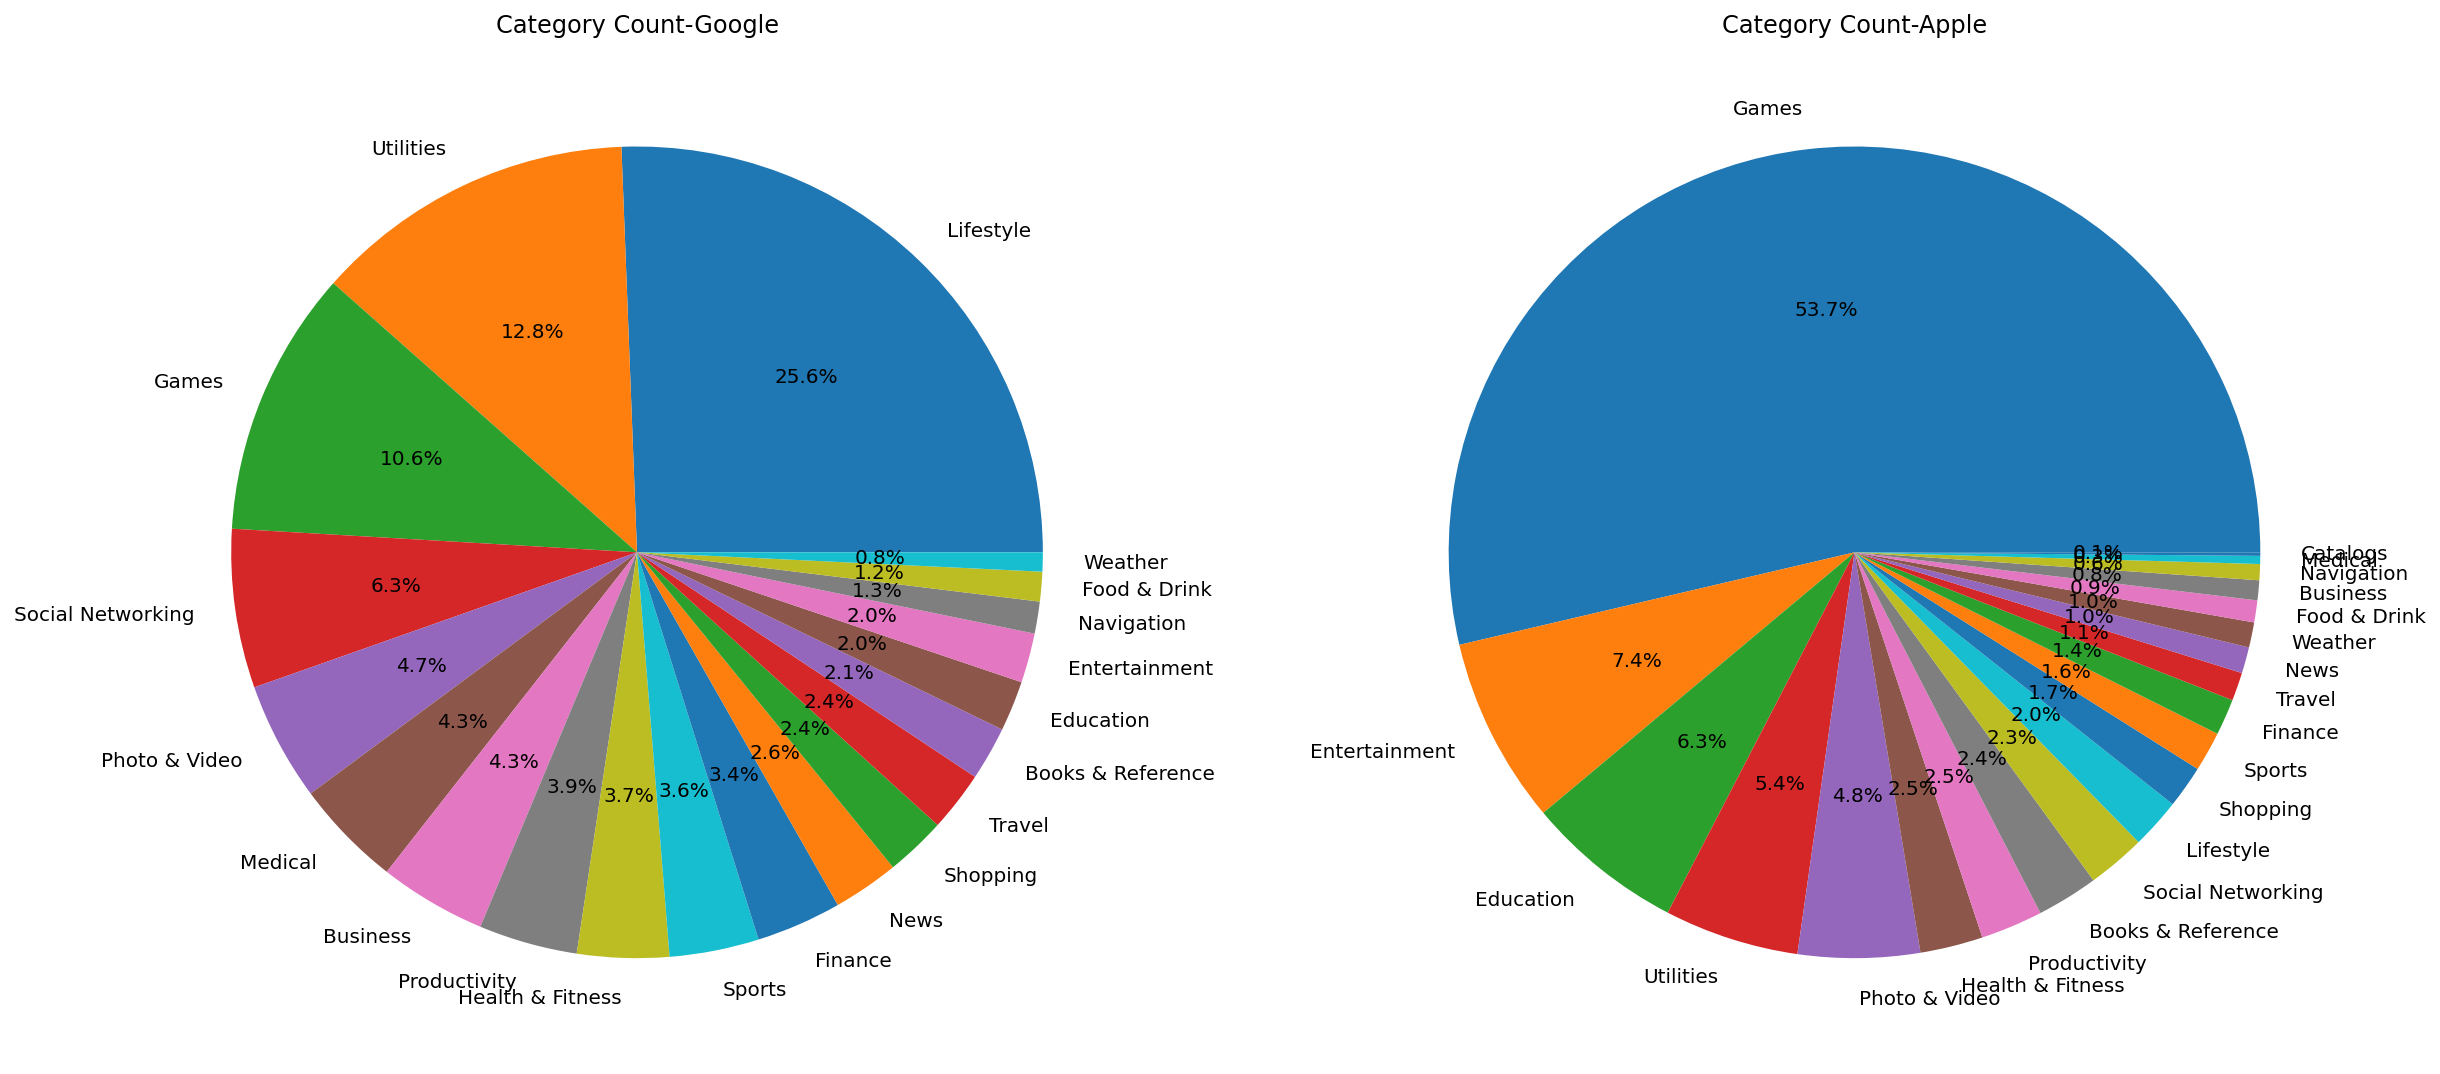

In [22]:
#the same figure for both subplots
fig2=plt.figure(figsize=(20,25),dpi=144)
#plt.suptitle('Free and Paid Comparsion')

#axes object for the firs pie chart
fig2_ax1=fig2.add_subplot(121)

#plot the first pie chart in ax1
fig2_ax1.pie(fig2_count1, labels=fig2_label1,autopct='%1.1f%%')
fig2_ax1.title.set_text('Category Count-Google')



#axes oject ofr the second pie chart
fig2_ax2=fig2.add_subplot(122)

#plot the second pie chart
fig2_ax2.pie(fig2_count2,labels=fig2_label2,autopct='%1.1f%%')
fig2_ax2.title.set_text('Category Count-Apple')

In [23]:
# app count by content rating
google_contentrating=google.groupby('Content Rating').mean()
google_contentrating['Count']=google['Content Rating'].value_counts()
google_contentrating=google_contentrating.sort_values('Count',ascending=False)


apple_contentrating=apple.groupby('Content Rating').mean()
apple_contentrating['Count']=apple['Content Rating'].value_counts()
apple_contentrating=apple_contentrating.sort_values('Count',ascending=False)

fig3_label1=[x for x in google_contentrating.index]
fig3_label2=[x for x in apple_contentrating.index]

fig3_count1=[x for x in google_contentrating['Count']]
fig3_count2=[x for x in apple_contentrating['Count']]

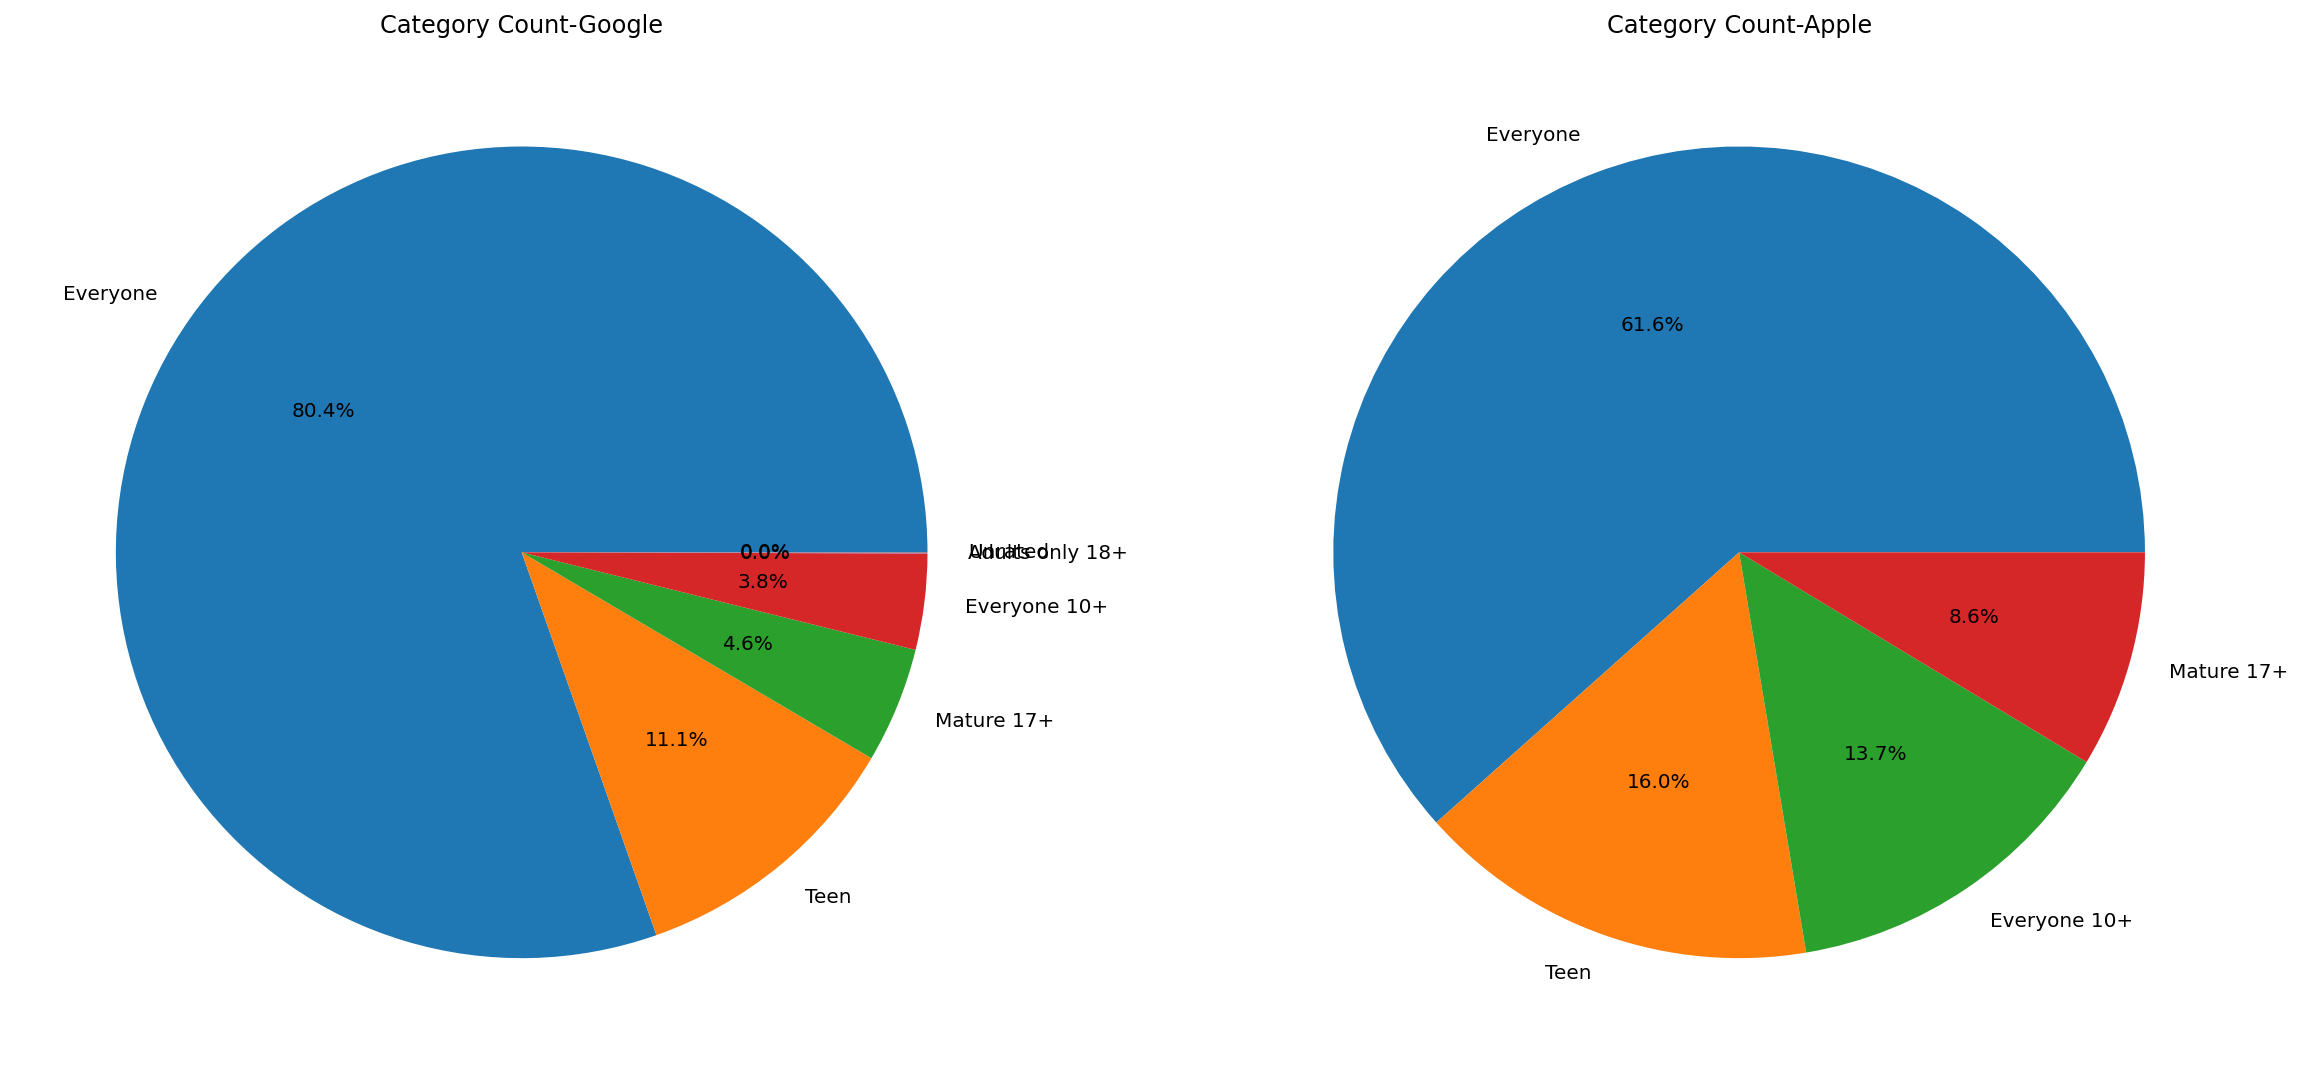

In [24]:
#the same figure for both subplots
fig3=plt.figure(figsize=(20,25),dpi=144)
#plt.suptitle('Free and Paid Comparsion')

#axes object for the firs pie chart
fig3_ax1=fig3.add_subplot(121)

#plot the first pie chart in ax1
fig3_ax1.pie(fig3_count1, labels=fig3_label1,autopct='%1.1f%%')
fig3_ax1.title.set_text('Category Count-Google')



#axes oject ofr the second pie chart
fig3_ax2=fig3.add_subplot(122)

#plot the second pie chart
fig3_ax2.pie(fig3_count2,labels=fig3_label2,autopct='%1.1f%%')
fig3_ax2.title.set_text('Category Count-Apple')

### label=[x for x in google_appcount_cat.index]

In [25]:
label

NameError: name 'label' is not defined